In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64


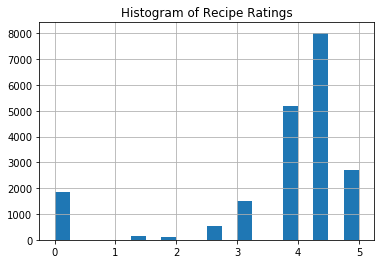

In [3]:
print(raw_data.rating.describe())
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [4]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [ ]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

In [ ]:
plt.scatter(Y, svr.predict(X))

In [ ]:
svr.score(X, Y)

In [ ]:
cross_val_score(svr, X, Y, cv=5)

## Improving the model
* drop na values but keep nutrition information (done)
* convert rating to classifications (done)
* 

In [5]:
df = raw_data.copy()
df = df.dropna()

In [6]:
df['rating'].value_counts()
df['rating'].describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [7]:
df['rating'] = np.where(df['rating']>df['rating'].quantile(.25), 'High rating', 'Low rating')
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",Low rating,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,High rating,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,Low rating,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,Low rating,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,High rating,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
svc = svm.LinearSVC(penalty='l1', C=10, tol=.01, dual=False)
X = df.drop(['rating', 'title'], axis=1)
Y = df['rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=10)

In [9]:
print("20% holdout sample:")
print(svc.fit(X_train, Y_train).score(X_test, Y_test))
print("\nFull sample:")
print(svc.fit(X, Y).score(X, Y))
print("\nCross Validation score:")
cross_val_score(svc, X, Y, cv=5)

20% holdout sample:
0.5928571428571429

Full sample:
0.6403807362581947

Cross Validation score:


array([0.58223062, 0.59407501, 0.59848724, 0.60750315, 0.61223203])

In [24]:
res = svc.fit(X, Y)
#print(res.coef_.shape)
important = {}
for x in range(4):
    important[x] = 2
for val in range(res.coef_.shape[1]):
    if res.coef_[0][val] >.5:
        important[val] = res.coef_[0][val]
sorted_by_value = sorted(important.items(), key=lambda kv: kv[1], reverse=True)
sorted_by_vals = sorted_by_value[:30]
print(sorted_by_vals)
key = []
for x in range(30):
    print(sorted_by_vals[x][0])
#df = df.iloc[:, important]

[(0, 2), (1, 2), (2, 2), (3, 2), (674, 1.9817919104890012), (322, 1.8272485655502684), (19, 1.6137503147342822), (539, 1.6000902452664107), (305, 1.5517486071462532), (162, 1.4855385483729118), (475, 1.4723833524576997), (438, 1.2332812239852715), (187, 1.1885214428957085), (205, 1.1461718806545331), (340, 1.1452516992332822), (289, 1.1348479670636846), (299, 1.1194425613852361), (11, 1.0693598928196646), (273, 0.9748309073055891), (109, 0.9223978227306546), (505, 0.9146654606768557), (306, 0.9124061995866469), (238, 0.8911069901024606), (376, 0.8633144376815634), (167, 0.8610771618728703), (312, 0.8602709237402104), (580, 0.8422776870999495), (157, 0.8380834286529867), (166, 0.8297272772055994), (467, 0.8239652409655637)]
0
1
2
3
674
322
19
539
305
162
475
438
187
205
340
289
299
11
273
109
505
306
238
376
167
312
580
157
166
467


In [ ]:
X = df.drop(['rating', 'title'], axis=1)
Y = df['rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=10)

In [ ]:
print("20% holdout sample:")
print(svc.fit(X_train, Y_train).score(X_test, Y_test))
print("\nFull sample:")
print(svc.fit(X, Y).score(X, Y))
print("\nCross Validation score:")
cross_val_score(svc, X, Y, cv=5)